# HOS 

In [1]:
# confronto tutte 
import pandas as pd

S6l = pd.read_csv("/home/silvia/Desktop/ONSET_POLLINO_S_6_lowpass.csv")     # filter [8,10,15,20]     windowin [50,100,150,200]         tresh [0.2,0.25,0.3,0.4,1.0]
S4l = pd.read_csv("/home/silvia/Desktop/ONSET_POLLINO_S_4_lowpass.csv")     # filter [8,10,15,20]     windowin [50,100,150,200]         tresh [0.2,0.25,0.3,0.4,1.0]
S6h = pd.read_csv("/home/silvia/Desktop/ONSET_POLLINO_S_6_highpass.csv")    # filter [1,2,3,5,10]     windowin [40,50,80,100,150,200]   tresh [0.1,0.2,0.25,0.3,0.4,1.0]
S4h = pd.read_csv("/home/silvia/Desktop/ONSET_POLLINO_S_4_highpass.csv")    # filter [1,2,3,5]        windowin [50,100,150,200]         tresh [0.2,0.25,0.3,0.4,1.0]

bonta_th = 5

bonta_S4l = []
bonta_S6l = []
bonta_S4h = []
bonta_S6h = []

for key in S4l.iloc[:,2:]:
    diff = S4l["trace_P_arrival_sample"] - S4l[key]
    bonta_S4l.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff))

for key in S6l.iloc[:,2:]:
    diff = S6l["trace_P_arrival_sample"] - S6l[key]
    bonta_S6l.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff))

for key in S4h.iloc[:,2:]:
    diff = S4h["trace_P_arrival_sample"] - S4h[key]
    bonta_S4h.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff))

for key in S6h.iloc[:,2:]:
    diff = S6h["trace_P_arrival_sample"] - S6h[key]
    bonta_S6h.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff))

Text(0.5, 0.98, 'Percentages of picks with error <= 5 for Pollino various settings')

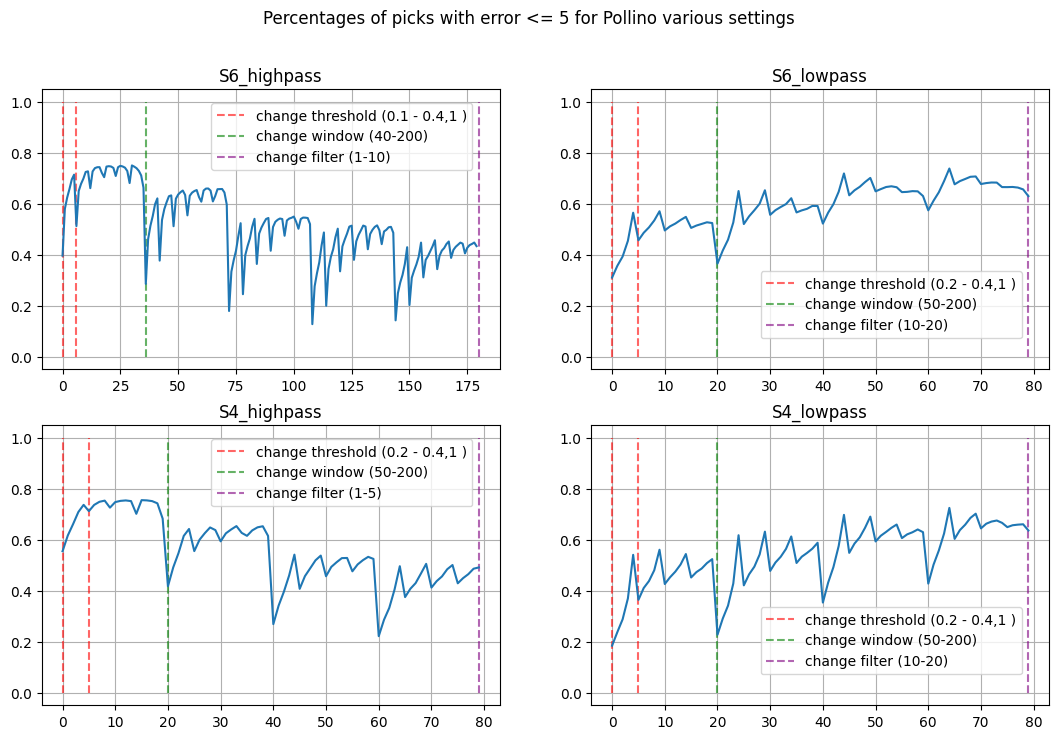

In [2]:
fig, axi = plt.subplots(2, 2, figsize=(13, 8))

axi[0][0].plot(bonta_S6h,zorder=51)
axi[0][0].vlines([0,6],0,1, color="red", zorder=51-1, alpha=0.6, linestyle="--", label="change threshold (0.1 - 0.4,1 )")
axi[0][0].vlines(36,0,1, color="green", zorder=51-1, alpha=0.6, linestyle="--", label="change window (40-200)")
axi[0][0].vlines(180,0,1, color="purple", zorder=51-1, alpha=0.6, linestyle="--", label="change filter (1-10)")
axi[0][0].legend(bbox_to_anchor=(0.37, 0.95), loc='upper left', borderaxespad=0)
axi[0][0].set_title("S6_highpass")
axi[0][0].grid()

axi[0][1].plot(bonta_S6l,zorder=51)
axi[0][1].vlines([0,5],0,1, color="red", zorder=51-1, alpha=0.6, linestyle="--", label="change threshold (0.2 - 0.4,1 )")
axi[0][1].vlines(20,0,1, color="green", zorder=51-1, alpha=0.6, linestyle="--", label="change window (50-200)")
axi[0][1].vlines(79,0,1, color="purple", zorder=51-1, alpha=0.6, linestyle="--", label="change filter (10-20)")
axi[0][1].legend(bbox_to_anchor=(0.37, 0.35), loc='upper left', borderaxespad=0)
axi[0][1].set_title("S6_lowpass")
axi[0][1].grid()

axi[1][0].plot(bonta_S4h, zorder=51)
axi[1][0].vlines([0,5],0,1, color="red", zorder=50, alpha=0.6, linestyle="--", label="change threshold (0.2 - 0.4,1 )")
axi[1][0].vlines(20,0,1, color="green", zorder=50, alpha=0.6, linestyle="--", label="change window (50-200)")
axi[1][0].vlines(79,0,1, color="purple", zorder=51-1, alpha=0.6, linestyle="--", label="change filter (1-5)")
axi[1][0].legend(bbox_to_anchor=(0.37, 0.95), loc='upper left', borderaxespad=0)
axi[1][0].set_title("S4_highpass")
axi[1][0].grid()

axi[1][1].plot(bonta_S4l,zorder=51)
axi[1][1].vlines([0,5],0,1, color="red", zorder=50, alpha=0.6, linestyle="--", label="change threshold (0.2 - 0.4,1 )")
axi[1][1].vlines(20,0,1, color="green", zorder=50, alpha=0.6, linestyle="--", label="change window (50-200)")
axi[1][1].vlines(79,0,1, color="purple", zorder=51-1, alpha=0.6, linestyle="--", label="change filter (10-20)")
axi[1][1].legend(bbox_to_anchor=(0.37, 0.35), loc='upper left', borderaxespad=0)
axi[1][1].set_title("S4_lowpass")
axi[1][1].grid()
fig.suptitle("Percentages of picks with error <= 5 for Pollino various settings")
#fig.savefig("/home/silvia/Desktop/Immagini/_HOS_Pollino_err_LE_5")


In [12]:
# verify number picks in [lower, upper]
import numpy as np
from Classe_sismogramma_v3 import  ClasseDataset
import pandas as pd
#hd = "/home/silvia/Desktop/Data/Pollino_All/Pollino_All_data_extended.hdf5"
#cs = "/home/silvia/Desktop/Data/Pollino_All/Pollino_All_metadata_extended.csv"
hd = "/home/silvia/Desktop/Data/DETECT/Detect_data_picked_extended.hdf5"
cs = "/home/silvia/Desktop/Data/DETECT/Detect_metadata_picked_extended.csv"

D = ClasseDataset()
D.leggi_custom_dataset(hd,cs)
lower = []
for i in range(len(D.sismogramma)):
    ky = "stat: <function S_6 at 0x7f171781daf0> type_filter: highpass filter freq: 1 window_width: 150 tresh: 0.2_ons_max"
    lower.append(np.argmax(np.abs(D.sismogramma[i])) - 1000)
    #ons_2[ky][i] += np.argmax(np.abs(D.sismogramma[i])) - 500
lower_b = pd.DataFrame.from_dict({"lower": lower })


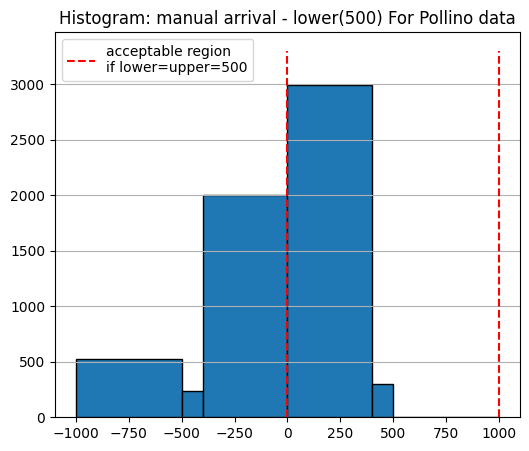

In [13]:
fig, ax0 = plt.subplots(1, 1, figsize=(6, 5))
A = (ons_2["trace_P_arrival_sample"] - lower_b["lower"]).hist(bins=[-1000,-500,-400,0,400,500,1000], edgecolor="black", ax=ax0)
ax0.grid(axis='x')
ax0.set_title("Histogram: manual arrival - lower(500) For Pollino data")
ax0.vlines([0,1000], 0, 3300, color="red", linestyles="--", label="acceptable region \nif lower=upper=500" )
plt.legend(loc="upper left")


In [1]:
import pandas as pd

ons_2 = pd.read_csv("/home/silvia/Desktop/ONSET_HOS/ONSET_DETECT_alredypicked_get_onset_4_search_intorno_maxhos_bound200_plus_window_after_origintime_entro_8_s_dopo.csv")

In [91]:
bonta_th = 40

recall = []
precision = []

for key in ons_2.iloc[:,2:]:
    diff = ons_2["trace_P_arrival_sample"] - ons_2[key] 
    recall.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff))
    precision.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(ons_2[key][ons_2[key]>0]))

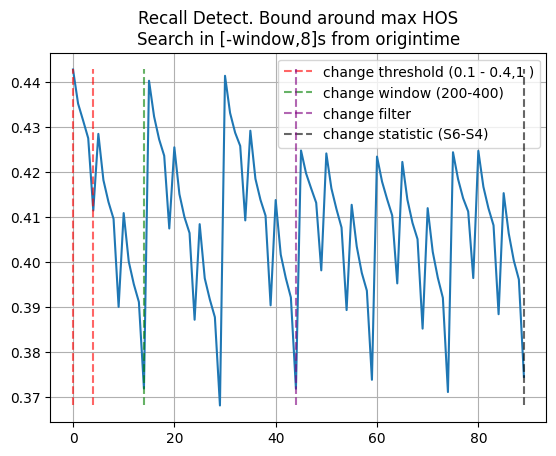

In [56]:
import matplotlib.pyplot as plt
import numpy as np
min_ = np.min(recall)
max_ = np.max(recall)
plt.plot(recall[::])

plt.grid()
plt.vlines([0,4],min_,max_, color="red", zorder=51-1, alpha=0.6, linestyle="--", label="change threshold (0.1 - 0.4,1 )")
plt.vlines([14,],min_,max_, color="green", zorder=51-1, alpha=0.6, linestyle="--", label="change window (200-400)")
plt.vlines(44,min_,max_, color="purple", zorder=51-1, alpha=0.6, linestyle="--", label="change filter")
plt.vlines(89,min_,max_, color="black", zorder=51-1, alpha=0.6, linestyle="--", label="change statistic (S6-S4)")
#plt.ylim([0.5,0.65])
plt.title("Recall Detect. Bound around max HOS\nSearch in [-window,8]s from origintime")
plt.legend()

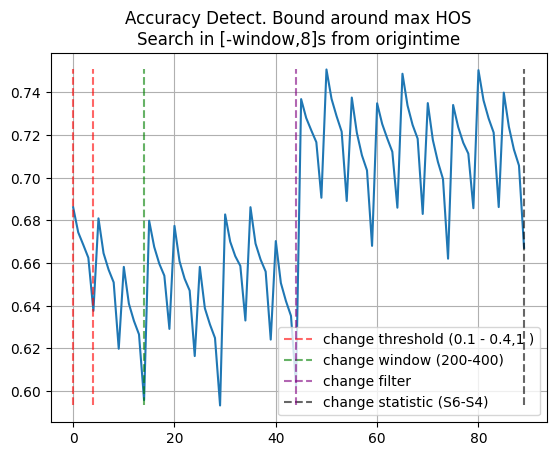

In [55]:
import matplotlib.pyplot as plt
min_ = np.min(precision)
max_ = np.max(precision)
plt.plot(precision[::])

plt.grid()
plt.vlines([0,4],min_,max_, color="red", zorder=51-1, alpha=0.6, linestyle="--", label="change threshold (0.1 - 0.4,1 )")
plt.vlines([14,],min_,max_, color="green", zorder=51-1, alpha=0.6, linestyle="--", label="change window (200-400)")
plt.vlines(44,min_,max_, color="purple", zorder=51-1, alpha=0.6, linestyle="--", label="change filter")
plt.vlines(89,min_,max_, color="black", zorder=51-1, alpha=0.6, linestyle="--", label="change statistic (S6-S4)")
#plt.ylim([0.5,0.68])
plt.title("Accuracy Detect. Bound around max HOS\nSearch in [-window,8]s from origintime")
plt.legend()


In [54]:
bonta_th = 20
std_mx = 10
recall = []
precision = []
for i in range(len(ons_2.keys())//5):
#    print(ons_2.iloc[:,2+i*5:2+i*5+5].keys())
    indi_concordi = list(ons_2.iloc[:,2+i*5:2+i*5+5][(ons_2.iloc[:,2+i*5:2+i*5+5].std(axis=1)<=std_mx) & (ons_2.iloc[:,2+i*5]>0)].index)
    for key in ons_2.iloc[:,2+i*5:2+i*5+5].keys():
        diff = ons_2["trace_P_arrival_sample"][indi_concordi] - ons_2[key][indi_concordi] 
        precision.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(diff))
        recall.append(len(diff[(diff<=bonta_th) & (diff>=-bonta_th)])/len(ons_2["trace_P_arrival_sample"]))

In [18]:
diff

1       -80
2       -21
3       -18
5        -5
7        -2
         ..
22767    -5
22768    -6
22769    -1
22770    -4
22771    -9
Length: 12785, dtype: int64

## altro

<AxesSubplot:>

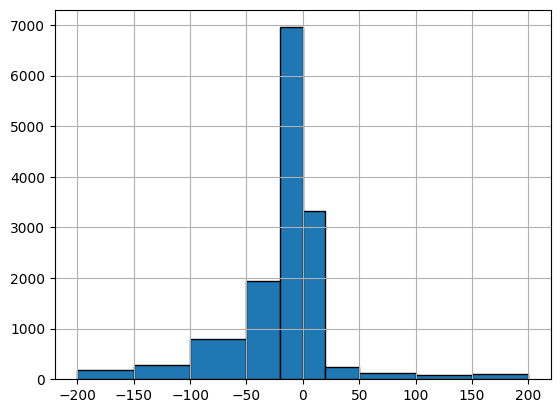

In [7]:
((ons_2["trace_P_arrival_sample"] - ons_2[vedok])).hist(edgecolor="black",bins=[-200,-150,-100,-50,-20,0,20,50,100,150,200])

In [9]:
from Classe_sismogramma_v3 import ClasseDataset
D=ClasseDataset()
D.leggi_custom_dataset("/home/silvia/Desktop/Data/DETECT/Detect_data_picked_extended.hdf5","/home/silvia/Desktop/Data/DETECT/Detect_metadata_picked_extended.csv")
D.demean()

/home/silvia/Documents/GitHub/primoprogetto/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/silvia/Documents/GitHub/primoprogetto/venv/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [18]:
a = ons_2[((ons_2["trace_P_arrival_sample"] - ons_2[vedok])<-1000) & ((ons_2["trace_P_arrival_sample"] - ons_2[vedok])>-2000)]
indi = list(a.index.values)

In [ ]:
_Library_HOS.freq_filter(D.sismogramma[i], 100, [1,20], type_filter= "bandpass")

In [118]:

i= 11

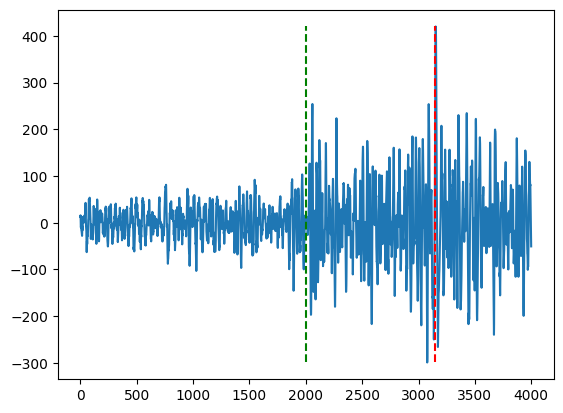

In [120]:
#plt.plot(sig)
import numpy as np
import matplotlib.pyplot as plt
s = 2000

sig =  _Library_HOS.freq_filter(D.sismogramma[indi[i]], 100, [1,20], type_filter= "bandpass")
#sig = D.sismogramma[indi[i]]
arrivo = D.metadata["trace_P_arrival_sample"][indi[i]]
plt.plot(sig[arrivo-s:arrivo+s])
min_ = np.min(sig[arrivo-s:arrivo+s])
max_ = np.max(sig[arrivo-s:arrivo+s])

plt.vlines(s,min_,max_,color="green", label = "arrivo", linestyles="--")
plt.vlines(ons_2[vedok][indi[i]]+s-arrivo,min_,max_,color="red", label = "arrivo", linestyles="--")



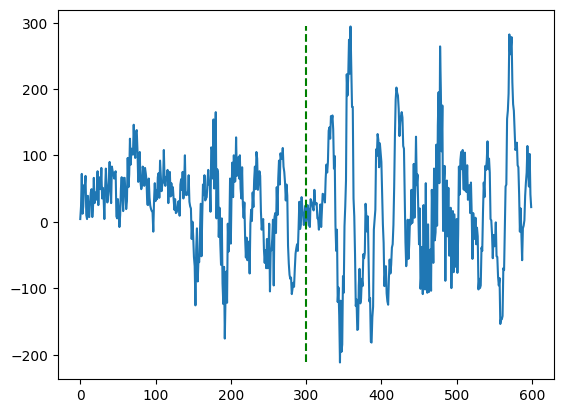

In [121]:
#plt.plot(sig)
import numpy as np
import matplotlib.pyplot as plt
s = 300

sig =  _Library_HOS.freq_filter(D.sismogramma[indi[i]], 100, [1,20], type_filter= "bandpass")
sig = D.sismogramma[indi[i]]
arrivo = D.metadata["trace_P_arrival_sample"][indi[i]]
plt.plot(sig[arrivo-s:arrivo+s])
min_ = np.min(sig[arrivo-s:arrivo+s])
max_ = np.max(sig[arrivo-s:arrivo+s])

plt.vlines(s,min_,max_,color="green", label = "arrivo", linestyles="--")
#plt.vlines(ons_2[vedok][indi[i]]+s-arrivo,min_,max_,color="red", label = "arrivo", linestyles="--")

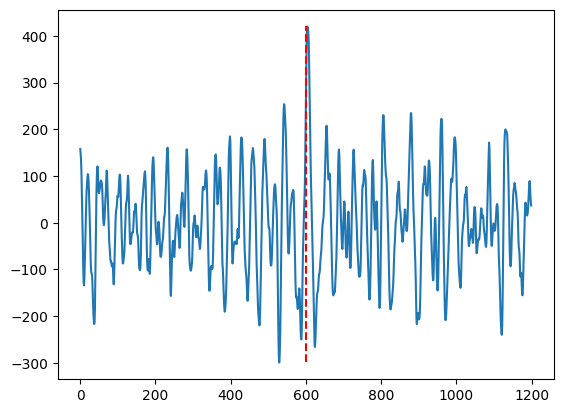

In [123]:
#plt.plot(sig)
import numpy as np
import matplotlib.pyplot as plt
s = 600

pic = ons_2[vedok][indi[i]]
arrivo = D.metadata["trace_P_arrival_sample"][indi[i]]


sig =  _Library_HOS.freq_filter(D.sismogramma[indi[i]], 100, [1,20], type_filter= "bandpass")
plt.plot(sig[pic-s:pic+s])

min_ = np.min(sig[pic-s:pic+s])
max_ = np.max(sig[pic-s:pic+s])

#plt.vlines(arrivo-pic+s,min_,max_,color="green", label = "arrivo", linestyles="--")
plt.vlines(s,min_,max_,color="red", label = "arrivo", linestyles="--")

#  PAUSE Change _Library_HOS to work on waveforms all at once!

#### Change sliding_window_view and statistics

In [1]:
import Codici._Library_HOS_parallel_computing as _Library_HOS_parallel_computing
import numpy as np

a = np.array([i for i in range(10)]) + np.random.random((10))
b = np.array([i+10 for i in range(10)]) + np.random.random((10))
c = np.array([i+20 for i in range(10)]) + np.random.random((10))
due_traces = np.array([a,b])
tre_traces = np.array([a,b,c])+np.random.random((3,10))
tre_traces

array([[ 1.56888843,  2.15675023,  3.69384081,  3.45159547,  4.71701537,
         6.12631746,  6.87529431,  8.53495899,  8.26449068,  9.61450057],
       [11.13526133, 12.11871685, 12.88371162, 14.21732432, 15.38675881,
        16.05977647, 17.02406025, 17.75154621, 18.85652372, 20.14775706],
       [21.24423927, 22.07370784, 23.38646214, 23.34781496, 24.99330981,
        25.12437929, 26.86682034, 28.06015659, 28.80979213, 29.22606121]])

In [ ]:
# FIXME NEW SHAPE
windowed = _Library_HOS.sliding_window_view(tre_traces,(4,),(1,))
reshape1 = windowed.reshape((windowed.shape[0]*windowed.shape[1],windowed.shape[2]),order="F")
reshape2 = reshape1.reshape((windowed.shape[1],windowed.shape[0],windowed.shape[2]))
reshape2.shape
#   (num_traces,  num_windows,    len_window)
#   (     3,          7,              4)
# Dopo aver fatto statistica, mi serve avere uno shape di:
#   (num_traces,   num_windows)
_Library_HOS.S_4(reshape2,axis=-1)  # Funziona (per S_6 vedi dopo)

In [ ]:
# FIXME NEW S_6 statistic

data_all = reshape2
np.sum((data_all-np.expand_dims(np.mean(data_all,axis=axis),axis=-1))**6,axis=axis)/(data_all.shape[-1]-1)/np.std(data_all,ddof=1,axis=axis)**6-15


In [14]:
windowed = _Library_HOS.sliding_window_view(due_traces,(4,),(1,))
windowed

array([[[ 0.49355703,  1.36516461,  2.49094507,  3.67495173],
        [10.4754864 , 11.51315078, 12.51562724, 13.23951818]],

       [[ 1.36516461,  2.49094507,  3.67495173,  4.98433422],
        [11.51315078, 12.51562724, 13.23951818, 14.54834631]],

       [[ 2.49094507,  3.67495173,  4.98433422,  5.94386421],
        [12.51562724, 13.23951818, 14.54834631, 15.64712488]],

       [[ 3.67495173,  4.98433422,  5.94386421,  6.43628322],
        [13.23951818, 14.54834631, 15.64712488, 16.25220119]],

       [[ 4.98433422,  5.94386421,  6.43628322,  7.91873155],
        [14.54834631, 15.64712488, 16.25220119, 17.48729665]],

       [[ 5.94386421,  6.43628322,  7.91873155,  8.42295917],
        [15.64712488, 16.25220119, 17.48729665, 18.46169721]],

       [[ 6.43628322,  7.91873155,  8.42295917,  9.49055103],
        [16.25220119, 17.48729665, 18.46169721, 19.45918373]]])

In [16]:
reshape1 = windowed.reshape((windowed.shape[0]*windowed.shape[1],windowed.shape[2]),order="F")
reshape2 = reshape1.reshape((windowed.shape[1],windowed.shape[0],windowed.shape[2]))
reshape2

array([[[ 0.49355703,  1.36516461,  2.49094507,  3.67495173],
        [ 1.36516461,  2.49094507,  3.67495173,  4.98433422],
        [ 2.49094507,  3.67495173,  4.98433422,  5.94386421],
        [ 3.67495173,  4.98433422,  5.94386421,  6.43628322],
        [ 4.98433422,  5.94386421,  6.43628322,  7.91873155],
        [ 5.94386421,  6.43628322,  7.91873155,  8.42295917],
        [ 6.43628322,  7.91873155,  8.42295917,  9.49055103]],

       [[10.4754864 , 11.51315078, 12.51562724, 13.23951818],
        [11.51315078, 12.51562724, 13.23951818, 14.54834631],
        [12.51562724, 13.23951818, 14.54834631, 15.64712488],
        [13.23951818, 14.54834631, 15.64712488, 16.25220119],
        [14.54834631, 15.64712488, 16.25220119, 17.48729665],
        [15.64712488, 16.25220119, 17.48729665, 18.46169721],
        [16.25220119, 17.48729665, 18.46169721, 19.45918373]]])

In [18]:
_Library_HOS.sliding_window_view(a,(4,),(1,))

array([[0.49355703, 1.36516461, 2.49094507, 3.67495173],
       [1.36516461, 2.49094507, 3.67495173, 4.98433422],
       [2.49094507, 3.67495173, 4.98433422, 5.94386421],
       [3.67495173, 4.98433422, 5.94386421, 6.43628322],
       [4.98433422, 5.94386421, 6.43628322, 7.91873155],
       [5.94386421, 6.43628322, 7.91873155, 8.42295917],
       [6.43628322, 7.91873155, 8.42295917, 9.49055103]])

In [21]:
reshape2[0]

array([[0.49355703, 1.36516461, 2.49094507, 3.67495173],
       [1.36516461, 2.49094507, 3.67495173, 4.98433422],
       [2.49094507, 3.67495173, 4.98433422, 5.94386421],
       [3.67495173, 4.98433422, 5.94386421, 6.43628322],
       [4.98433422, 5.94386421, 6.43628322, 7.91873155],
       [5.94386421, 6.43628322, 7.91873155, 8.42295917],
       [6.43628322, 7.91873155, 8.42295917, 9.49055103]])

In [22]:
_Library_HOS.S_6(reshape2[0])

array([-13.38032883, -13.3291254 , -13.47604115, -13.08671291,
       -12.78527542, -14.05955919, -12.83869574])

In [30]:
axis = -1
data = reshape2[1]
np.sum((data-np.mean(data,axis=axis)[:,None])**6,axis=axis)/(data.shape[1]-1)/np.std(data,ddof=1,axis=axis)**6-15


array([-13.39442875, -13.0488393 , -13.5539501 , -13.25174429,
       -13.00344149, -13.60509282, -13.24959532])

In [29]:
data_all = reshape2
np.sum((data_all-np.expand_dims(np.mean(data_all,axis=axis),axis=-1))**6,axis=axis)/(data_all.shape[-1]-1)/np.std(data_all,ddof=1,axis=axis)**6-15


array([[-13.38032883, -13.3291254 , -13.47604115, -13.08671291,
        -12.78527542, -14.05955919, -12.83869574],
       [-13.39442875, -13.0488393 , -13.5539501 , -13.25174429,
        -13.00344149, -13.60509282, -13.24959532]])

#### Change get_onset

In [1]:
import Codici._Library_HOS_parallel_computing as _Library_HOS_parallel_computing
import _Library_HOS
import numpy as np
import scipy
dim = 20
ar = np.random.random((dim))
br = np.random.random((dim))
cr = np.random.random((dim))
a = np.array([i for i in range(dim)]) + ar
b = np.array([i+dim for i in range(dim)]) + br
c = np.array([i+dim for i in range(dim)]) + cr
due_traces = np.array([a,b])
tre_traces = np.array([a,b,c])+np.random.random((3,dim))
#due_traces

In [32]:
i = 1
(scipy.signal.detrend(tre_traces)[i] - scipy.signal.detrend(tre_traces[i])) <=10**-12

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [29]:
type(scipy.signal.detrend(tre_traces)[i]) == type(scipy.signal.detrend(tre_traces[i]))

True

In [31]:
scipy.signal.detrend(tre_traces)[i].shape == scipy.signal.detrend(tre_traces[i]).shape

True

In [41]:
detr3 = scipy.signal.detrend(tre_traces)
detr = scipy.signal.detrend(tre_traces[i])


In [44]:
detr

array([ 0.5615912 , -0.52398539,  0.33060632, -0.09956434,  0.30929549,
        0.34223839, -0.29685693, -0.39836831, -0.14156015, -0.12585499,
       -0.35085872,  0.30898548, -0.95646999,  0.3219786 , -0.29733541,
        0.67086905,  0.6107593 , -0.1091305 , -0.60282567,  0.44648654])

In [80]:
detr3 = np.abs(detr3)
detr3

array([[0.2769372 , 0.00539027, 0.23781113, 0.76792842, 0.6040658 ,
        0.50394588, 0.01248392, 0.50749338, 0.29209979, 0.41432632,
        0.10477848, 0.21853789, 0.09204501, 0.21559625, 0.04088527,
        0.40258429, 0.74149846, 0.41099412, 0.66029148, 0.68065593],
       [0.5615912 , 0.52398539, 0.33060632, 0.09956434, 0.30929549,
        0.34223839, 0.29685693, 0.39836831, 0.14156015, 0.12585499,
        0.35085872, 0.30898548, 0.95646999, 0.3219786 , 0.29733541,
        0.67086905, 0.6107593 , 0.1091305 , 0.60282567, 0.44648654],
       [0.36869017, 0.04175837, 0.37730477, 0.40461304, 0.16904805,
        0.8822817 , 0.19769008, 0.56657281, 0.407991  , 0.74295388,
        0.33676843, 0.10376802, 0.13484077, 0.15498941, 0.25848179,
        0.41456711, 0.26720812, 0.24941324, 0.45031577, 0.00167914]])

In [88]:

_Library_HOS.sliding_window_view(detr3, (4,1), (1,1))

array([], shape=(0, 20, 4, 1), dtype=float64)

In [96]:
_Library_HOS_parallel_computing.sliding_window_view(tre_traces, (4,), (1,))[1]

array([[21.52443   , 21.45618694, 23.32811218, 23.91527505],
       [21.45618694, 23.32811218, 23.91527505, 25.34146841],
       [23.32811218, 23.91527505, 25.34146841, 26.39174484],
       [23.91527505, 25.34146841, 26.39174484, 26.76998304],
       [25.34146841, 26.39174484, 26.76998304, 27.6858052 ],
       [26.39174484, 26.76998304, 27.6858052 , 28.95994688],
       [26.76998304, 27.6858052 , 28.95994688, 29.99298557],
       [27.6858052 , 28.95994688, 29.99298557, 30.78531538],
       [28.95994688, 29.99298557, 30.78531538, 32.4624931 ],
       [29.99298557, 30.78531538, 32.4624931 , 32.21437116],
       [30.78531538, 32.4624931 , 32.21437116, 34.51015328],
       [32.4624931 , 32.21437116, 34.51015328, 34.90817279],
       [32.21437116, 34.51015328, 34.90817279, 36.89371079],
       [34.51015328, 34.90817279, 36.89371079, 37.85093457],
       [34.90817279, 36.89371079, 37.85093457, 38.1483783 ],
       [36.89371079, 37.85093457, 38.1483783 , 38.67201666],
       [37.85093457, 38.